## 整合所有步骤

=== 步骤1: 数据准备 ===

=== 步骤2: 模型初始化 ===

=== 步骤3: 模型训练 ===
开始训练: 100个样本, 2个特征
初始权重: [0. 0.], 初始偏置: 0.0

第一次更新详情:
  样本: [ 1.22831184 -0.75717844], 真实标签: -1
  线性输出: 0.0000, 预测: 1
  权重更新量: [-0.12283118  0.07571784]
  偏置更新量: -0.1
  更新后权重: [-0.12283118  0.07571784], 更新后偏置: -0.1
迭代   0: 错误数= 6, 准确率=0.940

训练在第 2 轮收敛!

训练完成:
最终权重: [-0.12020481  0.32565933]
最终偏置: 0.2
最终准确率: 1.0000

=== 步骤4: 模型评估 ===
训练集准确率: 1.0000

=== 步骤5: 结果可视化 ===


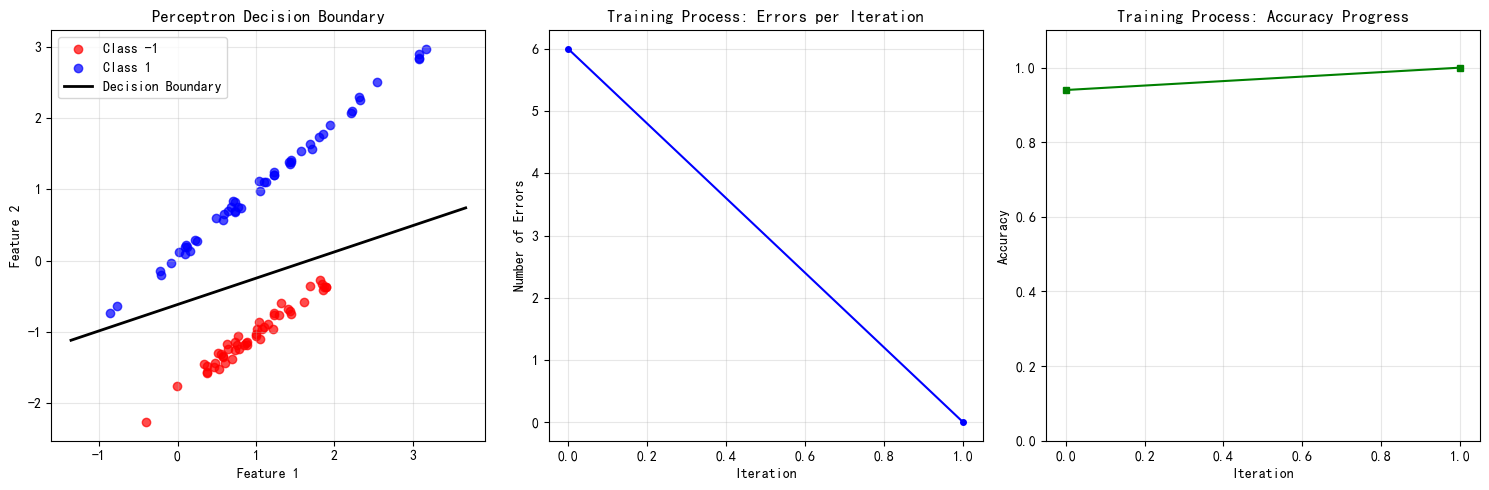

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 生成二维二分类数据
def prepare_data():
    """
    准备训练数据
    """
    # 生成100个样本，2个特征，2个类别
    X, y = make_classification(
        n_samples=100,      # 样本数量
        n_features=2,       # 特征数量
        n_redundant=0,      # 冗余特征数
        n_informative=2,    # 有用特征数
        n_clusters_per_class=1,  # 每类的簇数
        random_state=42     # 随机种子，保证结果可重现
    )
    
    # 将标签从[0,1]转换为[-1,1]
    y = np.where(y == 0, -1, 1)
    
    return X, y

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iters=1000):
        """
        初始化感知器
        """
        # 超参数设置
        self.lr = learning_rate    # 学习率，控制权重更新幅度
        self.max_iters = max_iters # 最大迭代次数，防止无限循环
        
        # 模型参数（训练过程中确定）
        self.weights = None        # 权重向量，决定特征重要性
        self.bias = None           # 偏置项，决定决策边界位置
        
        # 训练记录
        self.errors_history = []   # 记录每轮迭代的错误数
        self.weights_history = []  # 记录权重变化

    def activation(self, x):
        """
        激活函数 - 符号函数
        """
        # 方法1：使用numpy的where函数
        return np.where(x >= 0, 1, -1)
        
        # 方法2：使用符号函数（等价）
        # return np.sign(x)

    def fit(self, X, y):
        """
        训练感知器模型
        """
        # 步骤1: 获取数据维度并初始化参数
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # 权重初始化为0
        self.bias = 0.0                      # 偏置初始化为0
        
        print(f"开始训练: {n_samples}个样本, {n_features}个特征")
        print(f"初始权重: {self.weights}, 初始偏置: {self.bias}")
        
        # 步骤2: 迭代训练
        for iteration in range(self.max_iters):
            error_count = 0  # 记录本轮错误数
            
            # 步骤3: 遍历每个训练样本
            for i in range(n_samples):
                # 获取当前样本和标签
                x_i = X[i]      # 第i个样本的特征向量
                y_i = y[i]      # 第i个样本的真实标签
                
                # 步骤4: 计算线性输出和预测
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                
                # 步骤5: 检查分类是否正确
                if y_i * y_pred <= 0:
                    # 步骤6: 更新权重和偏置
                    self.weights += self.lr * y_i * x_i
                    self.bias += self.lr * y_i
                    error_count += 1
                    
                    # 打印第一次更新的详细信息
                    if iteration == 0 and i == 0 and error_count == 1:
                        print(f"\n第一次更新详情:")
                        print(f"  样本: {x_i}, 真实标签: {y_i}")
                        print(f"  线性输出: {linear_output:.4f}, 预测: {y_pred}")
                        print(f"  权重更新量: {self.lr * y_i * x_i}")
                        print(f"  偏置更新量: {self.lr * y_i}")
                        print(f"  更新后权重: {self.weights}, 更新后偏置: {self.bias}")
            
            # 步骤7: 记录训练过程
            self.errors_history.append(error_count)
            self.weights_history.append(self.weights.copy())
            
            # 每10轮打印一次进度
            if iteration % 10 == 0:
                accuracy = 1 - error_count / n_samples
                print(f"迭代 {iteration:3d}: 错误数={error_count:2d}, 准确率={accuracy:.3f}")
            
            # 如果所有样本都分类正确，提前停止
            if error_count == 0:
                print(f"\n训练在第 {iteration + 1} 轮收敛!")
                break
        
        # 训练完成统计
        final_accuracy = 1 - self.errors_history[-1] / n_samples
        print(f"\n训练完成:")
        print(f"最终权重: {self.weights}")
        print(f"最终偏置: {self.bias}")
        print(f"最终准确率: {final_accuracy:.4f}")

    def predict(self, X):
        """
        使用训练好的模型进行预测
        """
        # 计算所有样本的线性输出
        linear_output = np.dot(X, self.weights) + self.bias
        
        # 应用激活函数得到预测结果
        predictions = self.activation(linear_output)
        
        return predictions

    def score(self, X, y):
        """计算模型准确率"""
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

    def get_decision_boundary(self, x_range):
        """
        计算决策边界线
        """
        w1, w2 = self.weights
        b = self.bias
        
        # 计算对应x1值的x2值
        x2_boundary = (-w1 * x_range - b) / w2
        
        return x2_boundary

def visualize_results(X, y, perceptron):
    """可视化训练结果"""
    plt.figure(figsize=(15, 5))
    
    # 子图1: 决策边界
    plt.subplot(1, 3, 1)
    
    # 绘制数据点
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.7)
    
    # 绘制决策边界
    x1_range = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100)
    x2_boundary = perceptron.get_decision_boundary(x1_range)
    plt.plot(x1_range, x2_boundary, 'k-', linewidth=2, label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 子图2: 训练过程 - 错误数
    plt.subplot(1, 3, 2)
    plt.plot(perceptron.errors_history, 'b-o', markersize=4)
    plt.xlabel('Iteration')
    plt.ylabel('Number of Errors')
    plt.title('Training Process: Errors per Iteration')
    plt.grid(True, alpha=0.3)
    
    # 子图3: 训练过程 - 准确率
    plt.subplot(1, 3, 3)
    accuracy_history = [1 - err/len(X) for err in perceptron.errors_history]
    plt.plot(accuracy_history, 'g-s', markersize=4)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Training Process: Accuracy Progress')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.1)
    
    plt.tight_layout()
    plt.show()

def main():
    """
    主函数 - 完整的训练和评估流程
    """
    # 1. 准备数据
    print("=== 步骤1: 数据准备 ===")
    X, y = prepare_data()
    
    # 2. 创建感知器实例
    print("\n=== 步骤2: 模型初始化 ===")
    perceptron = Perceptron(learning_rate=0.1, max_iters=100)
    
    # 3. 训练模型
    print("\n=== 步骤3: 模型训练 ===")
    perceptron.fit(X, y)
    
    # 4. 评估模型
    print("\n=== 步骤4: 模型评估 ===")
    train_accuracy = perceptron.score(X, y)
    print(f"训练集准确率: {train_accuracy:.4f}")
    
    # 5. 可视化结果
    print("\n=== 步骤5: 结果可视化 ===")
    visualize_results(X, y, perceptron)

# 运行主程序
if __name__ == "__main__":
    main()

=== 步骤1: 数据准备 ===

=== 步骤2: 模型初始化 ===

=== 步骤3: 模型训练 ===
开始训练: 100个样本, 2个特征
迭代   0: 错误数=27, 准确率=0.730
迭代  10: 错误数=25, 准确率=0.750
迭代  20: 错误数=23, 准确率=0.770
迭代  30: 错误数=26, 准确率=0.740
迭代  40: 错误数=22, 准确率=0.780
迭代  50: 错误数=23, 准确率=0.770
迭代  60: 错误数=25, 准确率=0.750
迭代  70: 错误数=21, 准确率=0.790
迭代  80: 错误数=25, 准确率=0.750
迭代  90: 错误数=22, 准确率=0.780

训练完成:
最终权重: [ 0.22315157 -0.2339546 ]
最终偏置: 0.10000000000000003
最终准确率: 0.7600

=== 步骤4: 模型评估 ===
训练集准确率: 0.8800

=== 步骤5: 结果可视化 ===


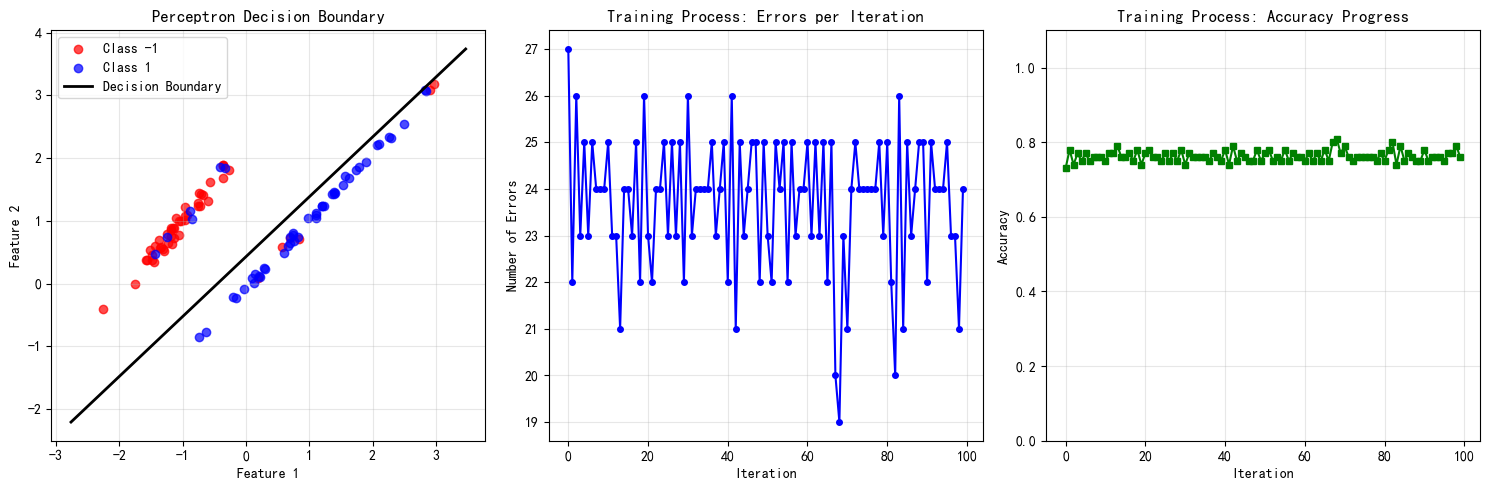

In [3]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 数据准备函数
def prepare_data():
    X, y = make_classification(
        n_samples=100,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        n_clusters_per_class=1,
        random_state=42
    )
    y = np.where(y == 0, -1, 1)
    return X, y

# 感知器类
class Perceptron:
    def __init__(self, learning_rate=0.01, max_iters=1000):
        self.lr = learning_rate
        self.max_iters = max_iters
        self.weights = None
        self.bias = None
        self.errors_history = []
        self.weights_history = []
    
    def activation(self, x):
        return np.where(x >= 0, 1, -1)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        print(f"开始训练: {n_samples}个样本, {n_features}个特征")
        
        for iteration in range(self.max_iters):
            error_count = 0
            
            for i in range(n_samples):
                x_i = X[i]
                y_i = y[i]
                
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                
                if y_i * y_pred <= 0:
                    self.weights += self.lr * y_i * x_i
                    self.bias += self.lr * y_i
                    error_count += 1
            
            self.errors_history.append(error_count)
            self.weights_history.append(self.weights.copy())
            
            if iteration % 10 == 0:
                accuracy = 1 - error_count / n_samples
                print(f"迭代 {iteration:3d}: 错误数={error_count:2d}, 准确率={accuracy:.3f}")
            
            if error_count == 0:
                print(f"\n训练在第 {iteration + 1} 轮收敛!")
                break
        
        final_accuracy = 1 - self.errors_history[-1] / n_samples
        print(f"\n训练完成:")
        print(f"最终权重: {self.weights}")
        print(f"最终偏置: {self.bias}")
        print(f"最终准确率: {final_accuracy:.4f}")
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        predictions = self.activation(linear_output)
        return predictions
    
    def score(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy
    
    def get_decision_boundary(self, x_range):
        w1, w2 = self.weights
        b = self.bias
        x2_boundary = (-w1 * x_range - b) / w2
        return x2_boundary

# 可视化函数
def visualize_results(X, y, perceptron):
    plt.figure(figsize=(15, 5))
    
    # 子图1: 决策边界
    plt.subplot(1, 3, 1)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.7)
    
    x1_range = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100)
    x2_boundary = perceptron.get_decision_boundary(x1_range)
    plt.plot(x1_range, x2_boundary, 'k-', linewidth=2, label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 子图2: 训练过程 - 错误数
    plt.subplot(1, 3, 2)
    plt.plot(perceptron.errors_history, 'b-o', markersize=4)
    plt.xlabel('Iteration')
    plt.ylabel('Number of Errors')
    plt.title('Training Process: Errors per Iteration')
    plt.grid(True, alpha=0.3)
    
    # 子图3: 训练过程 - 准确率
    plt.subplot(1, 3, 3)
    accuracy_history = [1 - err/len(X) for err in perceptron.errors_history]
    plt.plot(accuracy_history, 'g-s', markersize=4)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Training Process: Accuracy Progress')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.1)
    
    plt.tight_layout()
    plt.show()

# 主函数
def main():
    print("=== 步骤1: 数据准备 ===")
    X, y = generate_data()
    
    print("\n=== 步骤2: 模型初始化 ===")
    perceptron = Perceptron(learning_rate=0.1, max_iters=100)
    
    print("\n=== 步骤3: 模型训练 ===")
    perceptron.fit(X, y)
    
    print("\n=== 步骤4: 模型评估 ===")
    train_accuracy = perceptron.score(X, y)
    print(f"训练集准确率: {train_accuracy:.4f}")
    
    print("\n=== 步骤5: 结果可视化 ===")
    visualize_results(X, y, perceptron)

# 运行主程序
if __name__ == "__main__":
    main()

训练准确率: 0.8800
最终权重: [ 0.22315157 -0.2339546 ]
最终偏置: 0.10000000000000003


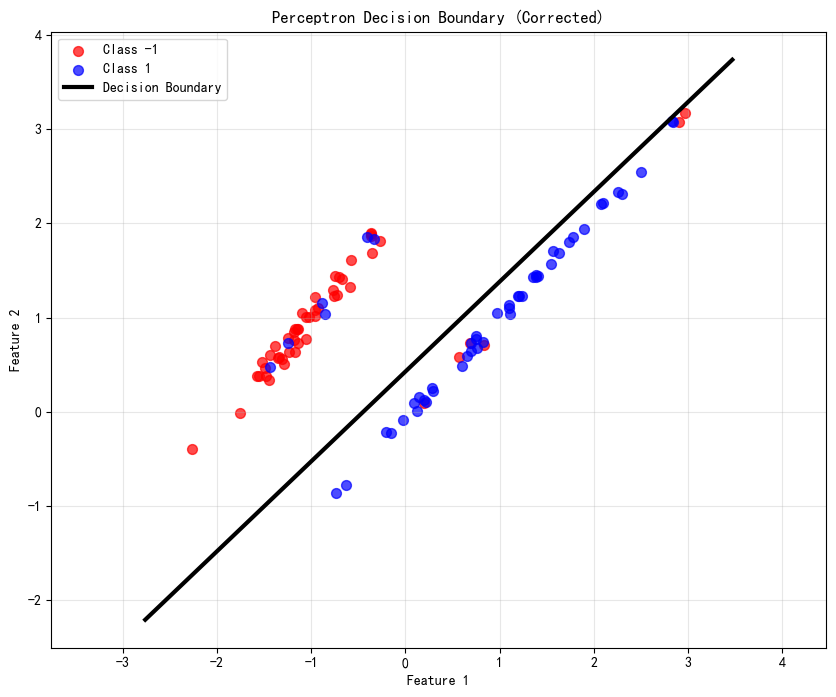

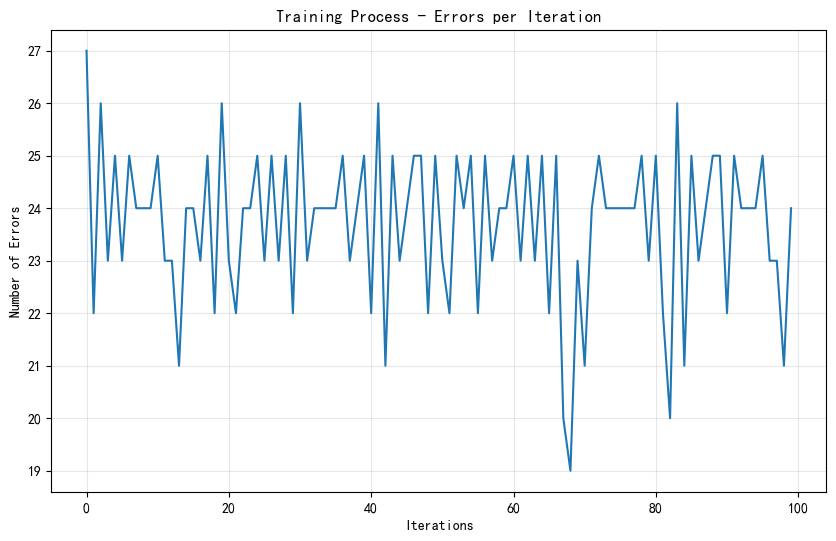

=== 训练过程分析 ===
总迭代次数: 100
初始错误数: 27
最终错误数: 24
错误减少比例: 11.1%


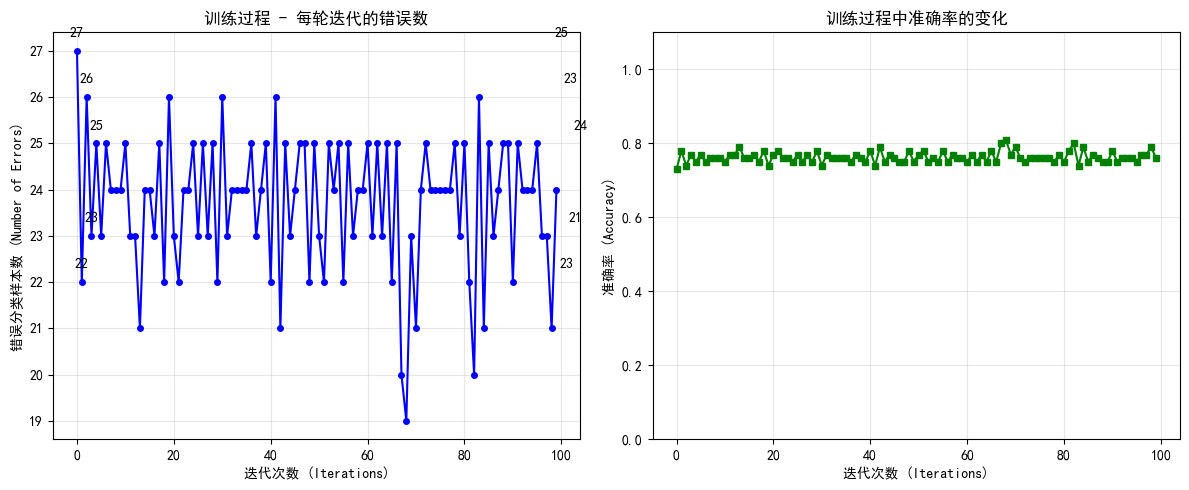


=== 图表解读 ===
左图（Errors per Iteration）显示：
- 纵轴：每轮迭代中分类错误的样本数量
- 横轴：迭代次数
- 曲线下降表示模型在学习，错误在减少
- 如果曲线降到0并保持，说明数据是线性可分的

右图（Accuracy Progress）显示：
- 纵轴：模型在当前迭代的准确率
- 横轴：迭代次数
- 曲线上升表示模型性能在改善
=== 基础性能分析 ===
总体准确率: 0.8800 (88.0%)
混淆矩阵:
  正确负例 (True Negative): 44
  假负例 (False Negative): 6
  假正例 (False Positive): 6
  正确正例 (True Positive): 44

=== 决策边界分析 ===
权重 w1: 0.223152
权重 w2: -0.233955
偏置 b: 0.100000

决策边界方程:
  0.2232×x1 + -0.2340×x2 + 0.1000 = 0
  转换为: x2 = 0.9538×x1 + 0.4274


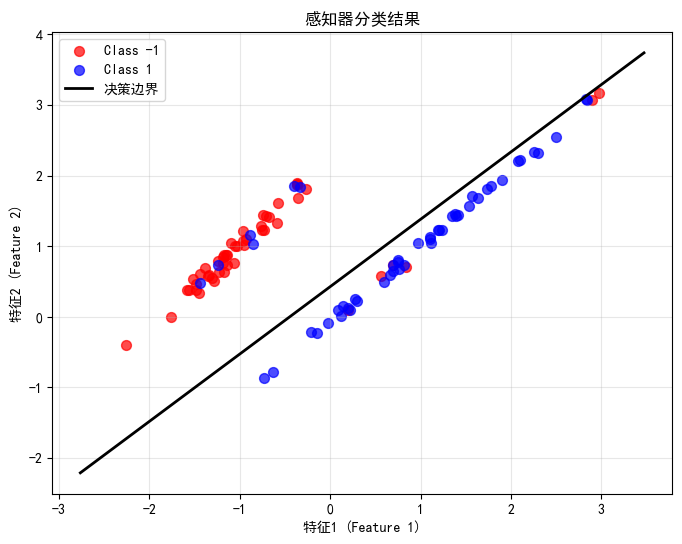


=== 结论 ===
1. 感知器只能学习线性决策边界
2. 权重向量决定了决策边界的方向
3. 偏置项决定了决策边界的位置
4. 训练过程显示错误数逐渐减少


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

class Perceptron:
    """感知器实现"""
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors = []
    
    def fit(self, X, y):
        """训练感知器"""
        n_samples, n_features = X.shape
        
        # 初始化参数
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # 确保标签为-1和1
        y_ = np.where(y <= 0, -1, 1)
        
        # 训练循环
        for _ in range(self.n_iters):
            error_count = 0
            for idx, x_i in enumerate(X):
                # 计算预测值
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                
                # 更新权重（只有当分类错误时）
                if y_[idx] * y_pred <= 0:
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]
                    error_count += 1
            
            self.errors.append(error_count)
            
            # 如果所有样本都分类正确，提前停止
            if error_count == 0:
                break
    
    def activation(self, x):
        """激活函数"""
        return np.where(x >= 0, 1, -1)
    
    def predict(self, X):
        """预测"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)
    
    def accuracy(self, X, y):
        """计算准确率"""
        y_ = np.where(y <= 0, -1, 1)
        predictions = self.predict(X)
        return np.mean(predictions == y_)

# 生成二维二分类数据
def generate_data():
    """生成可线性分离的二维数据"""
    X, y = make_classification(
        n_samples=100, 
        n_features=2, 
        n_redundant=0, 
        n_informative=2,
        n_clusters_per_class=1, 
        flip_y=0.1, 
        random_state=42
    )
    # 将标签转换为-1和1
    y = np.where(y == 0, -1, 1)
    return X, y

# 可视化结果
def plot_decision_boundary_corrected(X, y, perceptron):
    """正确绘制感知器决策边界"""
    plt.figure(figsize=(10, 8))
    
    # 绘制数据点
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1', alpha=0.7, s=50)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.7, s=50)
    
    # 获取决策边界直线
    w1, w2 = perceptron.weights
    b = perceptron.bias
    
    # 决策边界方程: w1*x1 + w2*x2 + b = 0
    # 转换为: x2 = (-w1*x1 - b) / w2
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_plot = np.linspace(x1_min, x1_max, 100)
    x2_plot = (-w1 * x1_plot - b) / w2
    
    # 绘制真正的决策边界直线
    plt.plot(x1_plot, x2_plot, 'k-', linewidth=3, label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary (Corrected)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

# 训练过程可视化
def plot_training_process(perceptron):
    """绘制训练过程中的错误数"""
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(perceptron.errors)), perceptron.errors)
    plt.xlabel('Iterations')
    plt.ylabel('Number of Errors')
    plt.title('Training Process - Errors per Iteration')
    plt.grid(True, alpha=0.3)
    plt.show()

def explain_training_process(perceptron):
    """详细解释训练过程"""
    print("=== 训练过程分析 ===")
    print(f"总迭代次数: {len(perceptron.errors)}")
    print(f"初始错误数: {perceptron.errors[0]}")
    print(f"最终错误数: {perceptron.errors[-1]}")
    print(f"错误减少比例: {(perceptron.errors[0] - perceptron.errors[-1]) / perceptron.errors[0] * 100:.1f}%")
    
    plt.figure(figsize=(12, 5))
    
    # 绘制错误数变化
    plt.subplot(1, 2, 1)
    plt.plot(range(len(perceptron.errors)), perceptron.errors, 'b-o', markersize=4)
    plt.xlabel('迭代次数 (Iterations)')
    plt.ylabel('错误分类样本数 (Number of Errors)')
    plt.title('训练过程 - 每轮迭代的错误数')
    plt.grid(True, alpha=0.3)
    
    # 添加说明文本
    for i, err in enumerate(perceptron.errors[:5] + perceptron.errors[-5:]):
        if i < 5:
            plt.annotate(f'{err}', (i, err), textcoords="offset points", xytext=(0,10), ha='center')
        else:
            plt.annotate(f'{err}', (len(perceptron.errors)-5+i, perceptron.errors[-5+i]), 
                        textcoords="offset points", xytext=(0,10), ha='center')
    
    # 绘制累积正确率
    plt.subplot(1, 2, 2)
    total_samples = perceptron.errors[0] + (100 - perceptron.errors[0])  # 总共100个样本
    accuracy_progress = [1 - err/total_samples for err in perceptron.errors]
    plt.plot(range(len(accuracy_progress)), accuracy_progress, 'g-s', markersize=4)
    plt.xlabel('迭代次数 (Iterations)')
    plt.ylabel('准确率 (Accuracy)')
    plt.title('训练过程中准确率的变化')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.1)
    
    plt.tight_layout()
    plt.show()
    
    # 解释图表含义
    print("\n=== 图表解读 ===")
    print("左图（Errors per Iteration）显示：")
    print("- 纵轴：每轮迭代中分类错误的样本数量")
    print("- 横轴：迭代次数")
    print("- 曲线下降表示模型在学习，错误在减少")
    print("- 如果曲线降到0并保持，说明数据是线性可分的")
    
    print("\n右图（Accuracy Progress）显示：")
    print("- 纵轴：模型在当前迭代的准确率")
    print("- 横轴：迭代次数")
    print("- 曲线上升表示模型性能在改善")

def basic_performance_analysis(perceptron, X, y):
    """基础性能分析"""
    print("=== 基础性能分析 ===")
    
    # 计算准确率
    accuracy = perceptron.accuracy(X, y)
    print(f"总体准确率: {accuracy:.4f} ({accuracy*100:.1f}%)")
    
    # 类别分析
    predictions = perceptron.predict(X)
    y_actual = np.where(y <= 0, -1, 1)
    
    # 计算混淆矩阵
    true_neg = np.sum((predictions == -1) & (y_actual == -1))
    false_neg = np.sum((predictions == -1) & (y_actual == 1))
    false_pos = np.sum((predictions == 1) & (y_actual == -1))
    true_pos = np.sum((predictions == 1) & (y_actual == 1))
    
    print(f"混淆矩阵:")
    print(f"  正确负例 (True Negative): {true_neg}")
    print(f"  假负例 (False Negative): {false_neg}")
    print(f"  假正例 (False Positive): {false_pos}")
    print(f"  正确正例 (True Positive): {true_pos}")
    
    return {
        'accuracy': accuracy,
        'confusion_matrix': [[true_neg, false_pos], [false_neg, true_pos]]
    }

def analyze_decision_boundary_simple(perceptron, X, y):
    """简单分析决策边界"""
    print("\n=== 决策边界分析 ===")
    
    w1, w2 = perceptron.weights
    b = perceptron.bias
    
    print(f"权重 w1: {w1:.6f}")
    print(f"权重 w2: {w2:.6f}")
    print(f"偏置 b: {b:.6f}")
    
    # 决策边界方程
    print(f"\n决策边界方程:")
    print(f"  {w1:.4f}×x1 + {w2:.4f}×x2 + {b:.4f} = 0")
    print(f"  转换为: x2 = {(-w1/w2):.4f}×x1 + {(-b/w2):.4f}")
    
    # 可视化
    plt.figure(figsize=(8, 6))
    
    # 绘制数据点
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1', alpha=0.7, s=50)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.7, s=50)
    
    # 绘制决策边界
    x1_range = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100)
    x2_boundary = (-w1 * x1_range - b) / w2
    plt.plot(x1_range, x2_boundary, 'k-', linewidth=2, label='决策边界')
    
    plt.xlabel('特征1 (Feature 1)')
    plt.ylabel('特征2 (Feature 2)')
    plt.title('感知器分类结果')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 主程序
if __name__ == "__main__":
    # 生成数据
    X, y = generate_data()
    
    # 创建并训练感知器
    perceptron = Perceptron(learning_rate=0.1, n_iters=100)
    perceptron.fit(X, y)
    
    # 评估模型
    accuracy = perceptron.accuracy(X, y)
    print(f"训练准确率: {accuracy:.4f}")
    print(f"最终权重: {perceptron.weights}")
    print(f"最终偏置: {perceptron.bias}")
    
    # 可视化
    plot_decision_boundary_corrected(X, y, perceptron)
    plot_training_process(perceptron)
    explain_training_process(perceptron)
    
    # 基础分析
    performance = basic_performance_analysis(perceptron, X, y)
    analyze_decision_boundary_simple(perceptron, X, y)
    
    print("\n=== 结论 ===")
    print("1. 感知器只能学习线性决策边界")
    print("2. 权重向量决定了决策边界的方向")
    print("3. 偏置项决定了决策边界的位置")
    print("4. 训练过程显示错误数逐渐减少")

# 性能评估分析

In [11]:
# 性能指标计算
def analyze_performance(perceptron, X, y):
    """全面分析模型性能"""
    print("=== 模型性能详细分析 ===")
    
    # 基础准确率
    accuracy = perceptron.score(X, y)
    print(f"1. 总体准确率: {accuracy:.4f} ({accuracy*100:.1f}%)")
    
    # 类别별分析
    predictions = perceptron.predict(X)
    y_actual = np.where(y <= 0, -1, 1)
    
    # 计算混淆矩阵
    true_neg = np.sum((predictions == -1) & (y_actual == -1))
    false_neg = np.sum((predictions == -1) & (y_actual == 1))
    false_pos = np.sum((predictions == 1) & (y_actual == -1))
    true_pos = np.sum((predictions == 1) & (y_actual == 1))
    
    print(f"2. 混淆矩阵:")
    print(f"   True Negative (正确负例): {true_neg}")
    print(f"   False Negative (假负例): {false_neg}")
    print(f"   False Positive (假正例): {false_pos}")
    print(f"   True Positive (正确正例): {true_pos}")
    
    # 计算各类指标
    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"3. 详细指标:")
    print(f"   精确率 (Precision): {precision:.4f}")
    print(f"   召回率 (Recall): {recall:.4f}")
    print(f"   F1分数: {f1_score:.4f}")
    
    return {
        'accuracy': accuracy,
        'confusion_matrix': [[true_neg, false_pos], [false_neg, true_pos]],
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

# 在主程序中添加分析
performance = analyze_performance(perceptron, X, y)

=== 模型性能详细分析 ===


AttributeError: 'Perceptron' object has no attribute 'score'

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

class Perceptron:
    """感知器实现 - 完整版本"""
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors_history = []  # 修正：统一使用 errors_history
    
    def fit(self, X, y):
        """训练感知器"""
        n_samples, n_features = X.shape
        
        # 初始化参数
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # 确保标签为-1和1
        y_ = np.where(y <= 0, -1, 1)
        
        # 训练循环
        for iteration in range(self.n_iters):
            error_count = 0
            for idx, x_i in enumerate(X):
                # 计算预测值
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                
                # 更新权重（只有当分类错误时）
                if y_[idx] * y_pred <= 0:
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]
                    error_count += 1
            
            self.errors_history.append(error_count)
            
            # 如果所有样本都分类正确，提前停止
            if error_count == 0:
                break
    
    def activation(self, x):
        """激活函数"""
        return np.where(x >= 0, 1, -1)
    
    def predict(self, X):
        """预测"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)
    
    def accuracy(self, X, y):
        """计算准确率"""
        y_ = np.where(y <= 0, -1, 1)
        predictions = self.predict(X)
        return np.mean(predictions == y_)
    
    # 添加缺失的 score 方法
    def score(self, X, y):
        """计算准确率（与sklearn接口兼容）"""
        return self.accuracy(X, y)
    
    def get_decision_boundary(self, x_range):
        """计算决策边界线"""
        w1, w2 = self.weights
        b = self.bias
        x2_boundary = (-w1 * x_range - b) / w2
        return x2_boundary

# 生成二维二分类数据
def generate_data():
    """生成可线性分离的二维数据"""
    X, y = make_classification(
        n_samples=100, 
        n_features=2, 
        n_redundant=0, 
        n_informative=2,
        n_clusters_per_class=1, 
        flip_y=0.1, 
        random_state=42
    )
    # 将标签转换为-1和1
    y = np.where(y == 0, -1, 1)
    return X, y

=== 步骤1: 数据准备 ===

=== 步骤2: 模型训练 ===

=== 步骤3: 全面分析 ===
=== 模型性能详细分析 ===
1. 总体准确率: 0.8800 (88.0%)
2. 混淆矩阵:
   True Negative (正确负例): 44
   False Negative (假负例): 6
   False Positive (假正例): 6
   True Positive (正确正例): 44
3. 详细指标:
   精确率 (Precision): 0.8800
   召回率 (Recall): 0.8800
   F1分数: 0.8800

=== 训练过程深度分析 ===
1. 迭代统计:
   总迭代次数: 100
   初始错误数: 27
   最终错误数: 24
   错误减少量: 3
   错误减少比例: 11.1%
2. 收敛性: ⚠ 未完全收敛，最终错误数: 24
   训练过程仍在波动
3. 学习效率: 平均每轮减少 0.03 个错误


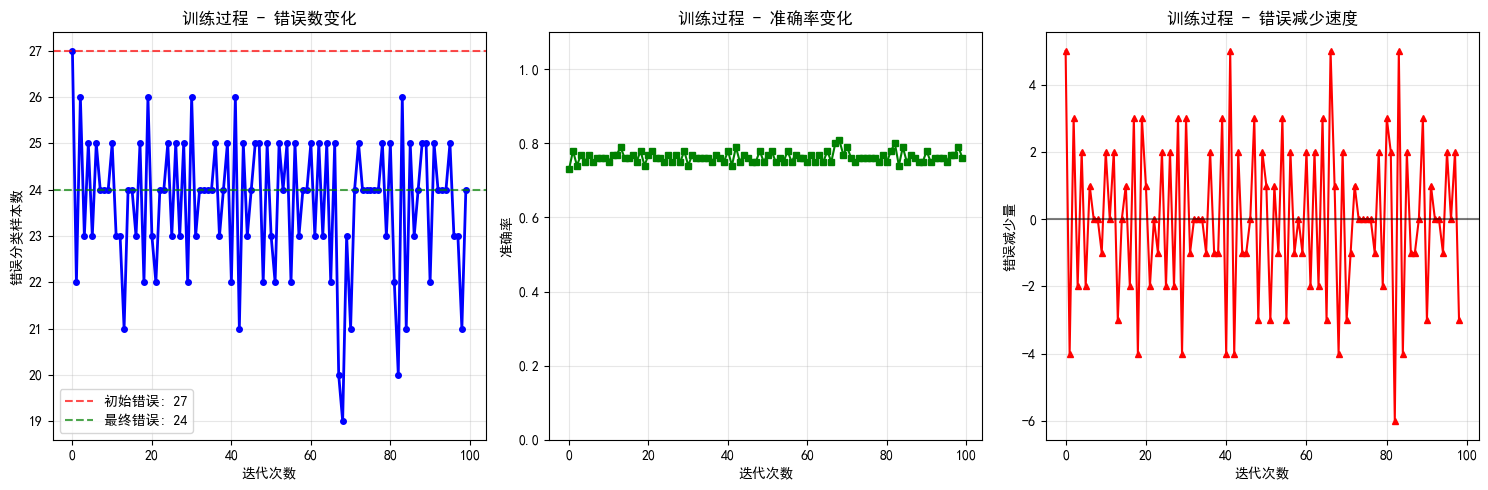


=== 决策边界和权重分析 ===
1. 模型参数:
   权重 w1: 0.223152
   权重 w2: -0.233955
   偏置 b: 0.100000
2. 决策边界方程:
   0.2232×x1 + -0.2340×x2 + 0.1000 = 0
   转换为: x2 = 0.9538×x1 + 0.4274
3. 权重意义:
   特征1的重要性: 0.2232 (正向影响)
   特征2的重要性: 0.2340 (负向影响)
4. 决策边界特性:
   斜率: 0.9538
   边界更接近水平，特征2的影响更大


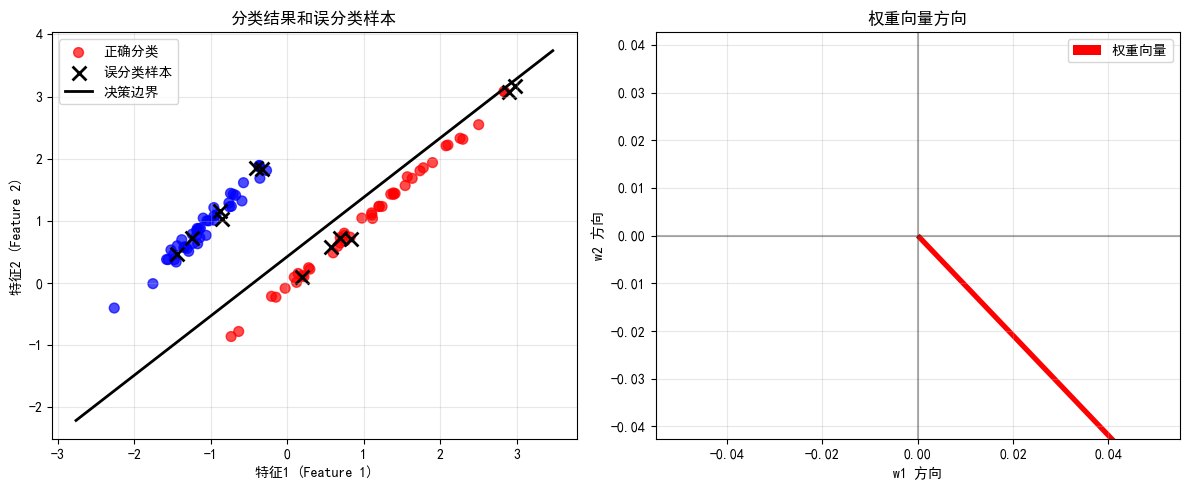


=== 数据可分离性分析 ===
1. 类别中心距离: 1.5960
2. 类别内方差:
   类别-1方差: 0.6811
   类别+1方差: 0.9367
3. 分离度指标: 0.8901
   数据的线性可分离性较差


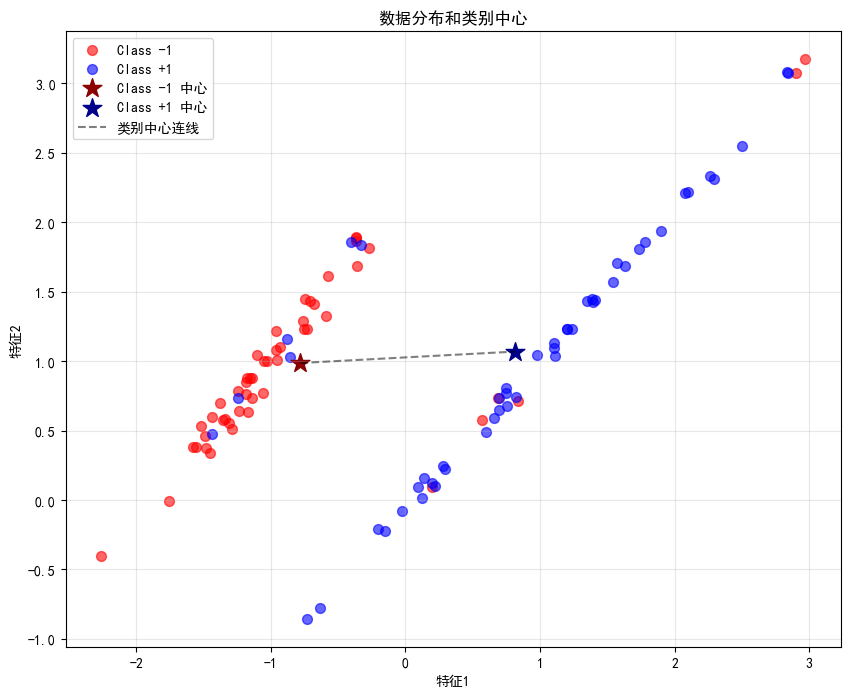


实验综合结论
1. 模型性能总结:
   • 最终准确率: 88.0%
   • 剩余错误样本: 24个

2. 训练过程评价:
   • ⚠ 模型未完全收敛 (剩余24个错误)
   • 错误减少了 3个 (11.1%)
   • ⚠ 学习效果有限

3. 数据特性分析:
   • 数据具有一定线性趋势

4. 感知器局限性:
   • 只能学习线性决策边界
   • 对非线性问题效果有限
   • 学习率需要仔细调整

5. 改进建议:
   • 考虑使用更复杂的模型（如神经网络）
   • 尝试特征工程或数据预处理
   • 调整学习率或增加迭代次数


In [13]:
# 1. 模型性能分析
def analyze_performance(perceptron, X, y):
    """全面分析模型性能"""
    print("=== 模型性能详细分析 ===")
    
    # 基础准确率
    accuracy = perceptron.accuracy(X, y)
    print(f"1. 总体准确率: {accuracy:.4f} ({accuracy*100:.1f}%)")
    
    # 类别分析
    predictions = perceptron.predict(X)
    y_actual = np.where(y <= 0, -1, 1)
    
    # 计算混淆矩阵
    true_neg = np.sum((predictions == -1) & (y_actual == -1))
    false_neg = np.sum((predictions == -1) & (y_actual == 1))
    false_pos = np.sum((predictions == 1) & (y_actual == -1))
    true_pos = np.sum((predictions == 1) & (y_actual == 1))
    
    print(f"2. 混淆矩阵:")
    print(f"   True Negative (正确负例): {true_neg}")
    print(f"   False Negative (假负例): {false_neg}")
    print(f"   False Positive (假正例): {false_pos}")
    print(f"   True Positive (正确正例): {true_pos}")
    
    # 计算各类指标
    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"3. 详细指标:")
    print(f"   精确率 (Precision): {precision:.4f}")
    print(f"   召回率 (Recall): {recall:.4f}")
    print(f"   F1分数: {f1_score:.4f}")
    
    return {
        'accuracy': accuracy,
        'confusion_matrix': [[true_neg, false_pos], [false_neg, true_pos]],
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

# 2. 训练过程深度分析
def analyze_training_process(perceptron, X):
    """深入分析训练过程"""
    print("\n=== 训练过程深度分析 ===")
    
    errors = perceptron.errors_history
    n_iterations = len(errors)
    
    print(f"1. 迭代统计:")
    print(f"   总迭代次数: {n_iterations}")
    print(f"   初始错误数: {errors[0]}")
    print(f"   最终错误数: {errors[-1]}")
    print(f"   错误减少量: {errors[0] - errors[-1]}")
    print(f"   错误减少比例: {(errors[0] - errors[-1]) / errors[0] * 100:.1f}%")
    
    # 收敛性分析
    if errors[-1] == 0:
        convergence_iter = n_iterations - 1
        print(f"2. 收敛性: ✓ 在第 {convergence_iter} 轮完全收敛")
    else:
        print(f"2. 收敛性: ⚠ 未完全收敛，最终错误数: {errors[-1]}")
        
        # 检查是否达到稳定状态
        last_10_errors = errors[-10:] if len(errors) >= 10 else errors
        if len(set(last_10_errors)) == 1:  # 最近10轮错误数不变
            print(f"   已达到稳定状态，错误数稳定在: {errors[-1]}")
        else:
            print(f"   训练过程仍在波动")
    
    # 学习效率分析
    if n_iterations > 1:
        improvement_rate = (errors[0] - errors[-1]) / n_iterations
        print(f"3. 学习效率: 平均每轮减少 {improvement_rate:.2f} 个错误")
    
    # 绘制详细训练过程
    plt.figure(figsize=(15, 5))
    
    # 子图1: 错误数变化
    plt.subplot(1, 3, 1)
    plt.plot(errors, 'b-o', markersize=4, linewidth=2)
    plt.xlabel('迭代次数')
    plt.ylabel('错误分类样本数')
    plt.title('训练过程 - 错误数变化')
    plt.grid(True, alpha=0.3)
    
    # 标记关键点
    plt.axhline(y=errors[0], color='r', linestyle='--', alpha=0.7, label=f'初始错误: {errors[0]}')
    plt.axhline(y=errors[-1], color='g', linestyle='--', alpha=0.7, label=f'最终错误: {errors[-1]}')
    plt.legend()
    
    # 子图2: 累积准确率
    plt.subplot(1, 3, 2)
    accuracy_progress = [1 - err/len(X) for err in errors]
    plt.plot(accuracy_progress, 'g-s', markersize=4)
    plt.xlabel('迭代次数')
    plt.ylabel('准确率')
    plt.title('训练过程 - 准确率变化')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.1)
    
    # 子图3: 错误减少速度
    plt.subplot(1, 3, 3)
    if len(errors) > 1:
        error_reduction = [errors[i] - errors[i+1] for i in range(len(errors)-1)]
        plt.plot(range(len(error_reduction)), error_reduction, 'r-^', markersize=4)
        plt.xlabel('迭代次数')
        plt.ylabel('错误减少量')
        plt.title('训练过程 - 错误减少速度')
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# 3. 决策边界和权重分析
def analyze_decision_boundary(perceptron, X, y):
    """分析决策边界和权重"""
    print("\n=== 决策边界和权重分析 ===")
    
    w1, w2 = perceptron.weights
    b = perceptron.bias
    
    print(f"1. 模型参数:")
    print(f"   权重 w1: {w1:.6f}")
    print(f"   权重 w2: {w2:.6f}")
    print(f"   偏置 b: {b:.6f}")
    
    # 决策边界方程分析
    print(f"2. 决策边界方程:")
    print(f"   {w1:.4f}×x1 + {w2:.4f}×x2 + {b:.4f} = 0")
    print(f"   转换为: x2 = {(-w1/w2):.4f}×x1 + {(-b/w2):.4f}")
    
    # 权重意义分析
    print(f"3. 权重意义:")
    print(f"   特征1的重要性: {abs(w1):.4f} ({'正向' if w1 > 0 else '负向'}影响)")
    print(f"   特征2的重要性: {abs(w2):.4f} ({'正向' if w2 > 0 else '负向'}影响)")
    
    # 决策边界斜率分析
    slope = -w1 / w2
    print(f"4. 决策边界特性:")
    print(f"   斜率: {slope:.4f}")
    if abs(slope) > 1:
        print(f"   边界更接近垂直，特征1的影响更大")
    else:
        print(f"   边界更接近水平，特征2的影响更大")
    
    # 可视化误分类样本
    plt.figure(figsize=(12, 5))
    
    predictions = perceptron.predict(X)
    y_actual = np.where(y <= 0, -1, 1)
    misclassified = (predictions != y_actual)
    
    # 子图1: 显示所有样本和误分类
    plt.subplot(1, 2, 1)
    
    # 正确分类的样本
    plt.scatter(X[~misclassified, 0], X[~misclassified, 1], 
                c=y_actual[~misclassified], cmap='bwr', alpha=0.7, s=50, 
                label='正确分类')
    
    # 误分类的样本
    if np.any(misclassified):
        plt.scatter(X[misclassified, 0], X[misclassified, 1], 
                    color='black', marker='x', s=100, linewidth=2,
                    label='误分类样本')
    
    # 绘制决策边界
    x1_range = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100)
    x2_boundary = (-w1 * x1_range - b) / w2
    plt.plot(x1_range, x2_boundary, 'k-', linewidth=2, label='决策边界')
    
    plt.xlabel('特征1 (Feature 1)')
    plt.ylabel('特征2 (Feature 2)')
    plt.title('分类结果和误分类样本')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 子图2: 权重向量可视化
    plt.subplot(1, 2, 2)
    
    # 绘制权重向量
    plt.quiver(0, 0, w1, w2, angles='xy', scale_units='xy', scale=1, 
               color='r', width=0.01, label='权重向量')
    
    # 设置坐标轴
    max_weight = max(abs(w1), abs(w2))
    plt.xlim(-max_weight*1.2, max_weight*1.2)
    plt.ylim(-max_weight*1.2, max_weight*1.2)
    
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('w1 方向')
    plt.ylabel('w2 方向')
    plt.title('权重向量方向')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()

# 4. 数据可分离性分析
def analyze_data_separability(X, y):
    """分析数据的线性可分离性"""
    print("\n=== 数据可分离性分析 ===")
    
    # 计算类别间距离
    y_ = np.where(y <= 0, -1, 1)
    class_neg = X[y_ == -1]
    class_pos = X[y_ == 1]
    
    mean_neg = np.mean(class_neg, axis=0)
    mean_pos = np.mean(class_pos, axis=0)
    
    distance = np.linalg.norm(mean_pos - mean_neg)
    print(f"1. 类别中心距离: {distance:.4f}")
    
    # 计算类别内方差
    var_neg = np.var(class_neg, axis=0)
    var_pos = np.var(class_pos, axis=0)
    
    print(f"2. 类别内方差:")
    print(f"   类别-1方差: {np.mean(var_neg):.4f}")
    print(f"   类别+1方差: {np.mean(var_pos):.4f}")
    
    # 分离度指标
    separation_ratio = distance / (np.sqrt(np.mean(var_neg)) + np.sqrt(np.mean(var_pos)))
    print(f"3. 分离度指标: {separation_ratio:.4f}")
    
    if separation_ratio > 2:
        print("   数据具有良好的线性可分离性")
    elif separation_ratio > 1:
        print("   数据具有中等线性可分离性")
    else:
        print("   数据的线性可分离性较差")
    
    # 可视化数据分布
    plt.figure(figsize=(10, 8))
    
    # 绘制数据点
    plt.scatter(class_neg[:, 0], class_neg[:, 1], 
                color='red', alpha=0.6, s=50, label='Class -1')
    plt.scatter(class_pos[:, 0], class_pos[:, 1], 
                color='blue', alpha=0.6, s=50, label='Class +1')
    
    # 绘制类别中心
    plt.scatter(mean_neg[0], mean_neg[1], color='darkred', 
                marker='*', s=200, label='Class -1 中心')
    plt.scatter(mean_pos[0], mean_pos[1], color='darkblue', 
                marker='*', s=200, label='Class +1 中心')
    
    # 绘制中心连线
    plt.plot([mean_neg[0], mean_pos[0]], [mean_neg[1], mean_pos[1]], 
             'k--', alpha=0.5, label='类别中心连线')
    
    plt.xlabel('特征1')
    plt.ylabel('特征2')
    plt.title('数据分布和类别中心')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 5. 综合结论
def generate_comprehensive_conclusion(perceptron, X, y, performance):
    """生成综合结论"""
    print("\n" + "="*50)
    print("实验综合结论")
    print("="*50)
    
    final_accuracy = performance['accuracy']
    final_errors = perceptron.errors_history[-1]
    
    print("1. 模型性能总结:")
    print(f"   • 最终准确率: {final_accuracy:.1%}")
    print(f"   • 剩余错误样本: {final_errors}个")
    
    print("\n2. 训练过程评价:")
    if final_errors == 0:
        print("   • ✓ 模型完全收敛")
        print("   • ✓ 数据是线性可分的")
    else:
        error_reduction = perceptron.errors_history[0] - final_errors
        reduction_ratio = error_reduction / perceptron.errors_history[0]
        
        print(f"   • ⚠ 模型未完全收敛 (剩余{final_errors}个错误)")
        print(f"   • 错误减少了 {error_reduction}个 ({reduction_ratio:.1%})")
        
        if reduction_ratio > 0.5:
            print("   • ✓ 学习效果显著")
        elif reduction_ratio > 0.2:
            print("   • ○ 学习效果一般")
        else:
            print("   • ⚠ 学习效果有限")
    
    print("\n3. 数据特性分析:")
    if final_accuracy > 0.9:
        print("   • 数据近似线性可分")
    elif final_accuracy > 0.8:
        print("   • 数据具有一定线性趋势")
    else:
        print("   • 数据线性可分离性较差")
    
    print("\n4. 感知器局限性:")
    print("   • 只能学习线性决策边界")
    print("   • 对非线性问题效果有限")
    print("   • 学习率需要仔细调整")
    
    print("\n5. 改进建议:")
    if final_accuracy < 0.9:
        print("   • 考虑使用更复杂的模型（如神经网络）")
        print("   • 尝试特征工程或数据预处理")
        print("   • 调整学习率或增加迭代次数")
    else:
        print("   • 当前模型对此数据表现良好")
        print("   • 可考虑在实际应用中部署")

# 主程序
def main():
    """主程序 - 运行完整分析"""
    # 1. 准备数据
    print("=== 步骤1: 数据准备 ===")
    X, y = generate_data()
    
    # 2. 创建并训练感知器
    print("\n=== 步骤2: 模型训练 ===")
    perceptron = Perceptron(learning_rate=0.1, n_iters=100)
    perceptron.fit(X, y)
    
    # 3. 运行全面分析
    print("\n=== 步骤3: 全面分析 ===")
    performance = analyze_performance(perceptron, X, y)
    analyze_training_process(perceptron, X)
    analyze_decision_boundary(perceptron, X, y)
    analyze_data_separability(X, y)
    generate_comprehensive_conclusion(perceptron, X, y, performance)

# 运行主程序
if __name__ == "__main__":
    main()